# Uploading the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('/content/drive/MyDrive/Defence/our-dataset.csv')
df

,Age,Gender,Education,Live with,Conflict with law,Most used drugs,Motive about drug,motivation by friends,Spend most time,Mental/emotional problem,...,Addicted person in family,no. of friends,Withdrawal symptoms,Satisfied with workplace,Case in court,Living with drug user,Smoking,Easy to control use of drug,Frequency of drug usage,Taken drug while experiencing stress
0,between 22 to 35 years,Male,Undergraduate,Hostel/Hall,Yes,Weed,Disease,"Yes, often they do",Alone,Depression/ inferiority/Guilt,...,No,Many (more than 5),No,No,No,Yes,"Yes, every day.","Yes, It's possible",Once/twice a week,Yes
1,between 22 to 35 years,Male,H.S.C / A levels,With Family/Relatives,Yes,Others,Should avoid,"Yes, often they do",Friends,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,No,Many (more than 5),Yes,No,No,No,"Yes, every day.","Yes, It's possible",Occasionally,Yes
2,15 to 22 years,Male,H.S.C / A levels,With Family/Relatives,Yes,Heroin,Disease,"Yes, often they do",Friends,Depression/ inferiority/Guilt,...,No,Many (more than 5),I have no idea,No,Yes,Yes,"Yes, every day.","No, It's not possible",Once/twice a week,Yes
3,between 22 to 35 years,Male,Undergraduate,With Family/Relatives,Yes,Yaba,Social trend,"Yes, often they do",Friends,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,No,Many (more than 5),Yes,Yes,No,Yes,"Yes, every day.","Yes, It's possible",Once/twice a week,Yes
4,between 22 to 35 years,Male,Undergraduate,With Family/Relatives,No,I don't take drugs,"Social trend, Should avoid","No, they don't",Alone,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,No,Many (more than 5),Yes,Yes,No,No,"Yes, every day.","Yes, It's possible",Never/ Not applicable,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,between 22 to 35 years,Male,Postgraduate (MSc/PhD),Hostel/Hall,No,"Weed, Others, Cigarette","Relief Stress, Curiosity, To increase energy","Yes, often they do",Family/ Relatives,Tension/Anxiety,...,No,Few (1-4),Yes,No,No,Yes,"Yes, every day.","No, It's not possible",Once/twice a week,Yes
2342,between 22 to 35 years,Female,H.S.C / A levels,Hostel/Hall,No,Alcohol,"Curiosity, Recreation, Social Trend","Yes, often they do",Friends,"Depression/ inferiority/Guilt, Anger",...,Yes,Few (1-4),Yes,Yes,No,Yes,"No, I don't","Yes, It's possible",Occasionally,Yes
2343,between 22 to 35 years,Male,Undergraduate,Hostel/Hall,No,"Cocaine, Yaba, Others, Cigarette","Relief Stress, To increase energy","Yes, often they do",Friends,"Depression/ inferiority/Guilt, Anger",...,No,Many (more than 5),Yes,Yes,No,Yes,"Yes, every day.","No, It's not possible",Once/twice a week,Yes
2344,between 22 to 35 years,Male,H.S.C / A levels,Hostel/Hall,No,"Weed, Cocaine, Phensedyl","Relief Stress, Recreation, To increase energy","No, they don't",Alone,"Depression/ inferiority/Guilt, Anger",...,Yes,Few (1-4),Yes,Yes,No,No,"Yes, occasionally","No, It's not possible",Once/twice a week,Yes


# EDA

In [3]:
df.shape

(2346, 23)

In [4]:
df.columns

Index(['Age', 'Gender', 'Education', 'Live with', 'Conflict with law',
       'Most used drugs', 'Motive about drug', 'motivation by friends',
       'Spend most time', 'Mental/emotional problem', 'Suicidal thoughts',
       'Family relationship', 'Financials of family',
       'Addicted person in family', 'no. of friends', 'Withdrawal symptoms',
       'Satisfied with workplace', 'Case in court', 'Living with drug user',
       'Smoking', 'Easy to control use of drug', 'Frequency of drug usage',
       'Taken drug while experiencing stress'],
      dtype='object')

In [5]:
df.isnull().sum()

Age                                       0
Gender                                    0
Education                                 0
Live with                                 0
Conflict with law                         0
Most used drugs                           0
Motive about drug                         0
motivation by friends                     0
Spend most time                           0
Mental/emotional problem                260
Suicidal thoughts                         0
Family relationship                       0
Financials of family                      0
Addicted person in family                 0
no. of friends                          152
Withdrawal symptoms                       0
Satisfied with workplace                  0
Case in court                             0
Living with drug user                     0
Smoking                                   0
Easy to control use of drug               0
Frequency of drug usage                   0
Taken drug while experiencing st

In [6]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Verify if there are any missing values left
print("Missing values after removal:")
print(df_cleaned.isnull().sum())

Missing values after removal:
Age                                     0
Gender                                  0
Education                               0
Live with                               0
Conflict with law                       0
Most used drugs                         0
Motive about drug                       0
motivation by friends                   0
Spend most time                         0
Mental/emotional problem                0
Suicidal thoughts                       0
Family relationship                     0
Financials of family                    0
Addicted person in family               0
no. of friends                          0
Withdrawal symptoms                     0
Satisfied with workplace                0
Case in court                           0
Living with drug user                   0
Smoking                                 0
Easy to control use of drug             0
Frequency of drug usage                 0
Taken drug while experiencing stress    0
dtyp

In [7]:
df.describe()

,Age,Gender,Education,Live with,Conflict with law,Most used drugs,Motive about drug,motivation by friends,Spend most time,Mental/emotional problem,...,Addicted person in family,no. of friends,Withdrawal symptoms,Satisfied with workplace,Case in court,Living with drug user,Smoking,Easy to control use of drug,Frequency of drug usage,Taken drug while experiencing stress
count,2346,2346,2346,2346,2346,2346,2346,2346,2346,2086,...,2346,2194,2346,2346,2346,2346,2346,2346,2346,2346
unique,4,2,5,3,2,98,35,4,4,33,...,3,2,3,2,2,3,4,3,4,2
top,between 22 to 35 years,Male,Undergraduate,Hostel/Hall,No,I don't take drugs,Should avoid,"No, they don't",Friends,Depression/ inferiority/Guilt,...,No,Many (more than 5),I have no idea,Yes,No,No,"Yes, every day.","Yes, It's possible",Never/ Not applicable,No
freq,1346,1690,1344,954,1710,1102,692,1314,1284,384,...,1590,1490,1000,1522,2036,1360,1008,1560,1094,1244


# Data Visualization

In [8]:
# Importing libraries
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Suicidal thoughts', ylabel='count'>

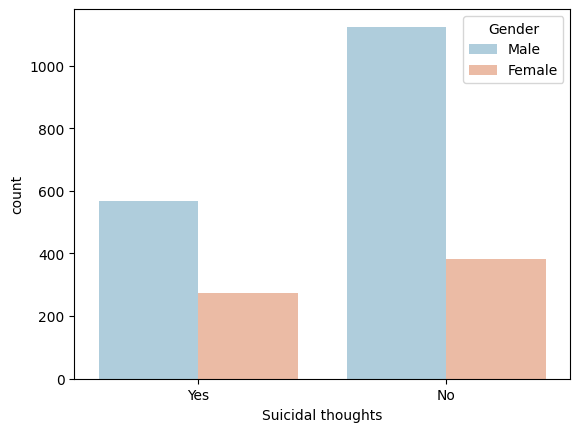

In [9]:
sns.countplot(x='Suicidal thoughts',hue='Gender',data=df,palette='RdBu_r')

From the above plot we see suicidal thoughts are more in Male compared to Female.

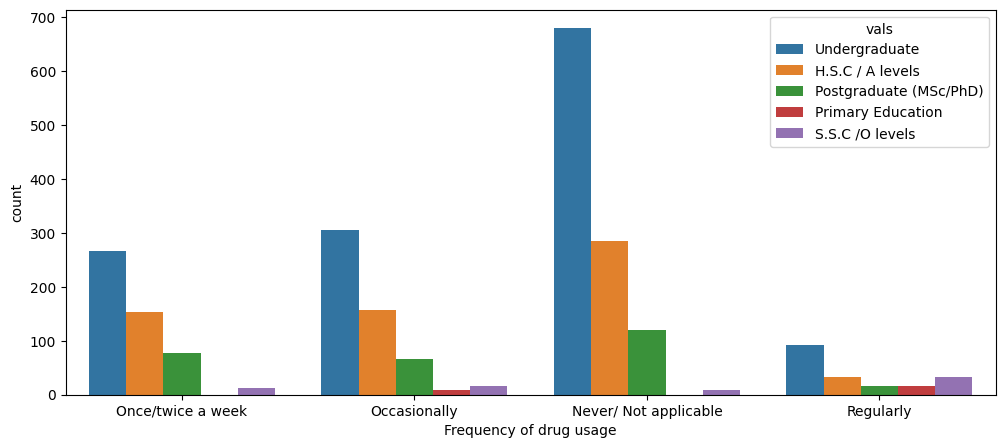

In [10]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Education'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

From the above plot we see Regular usage of Drug is more common in undergraduates than compared to others

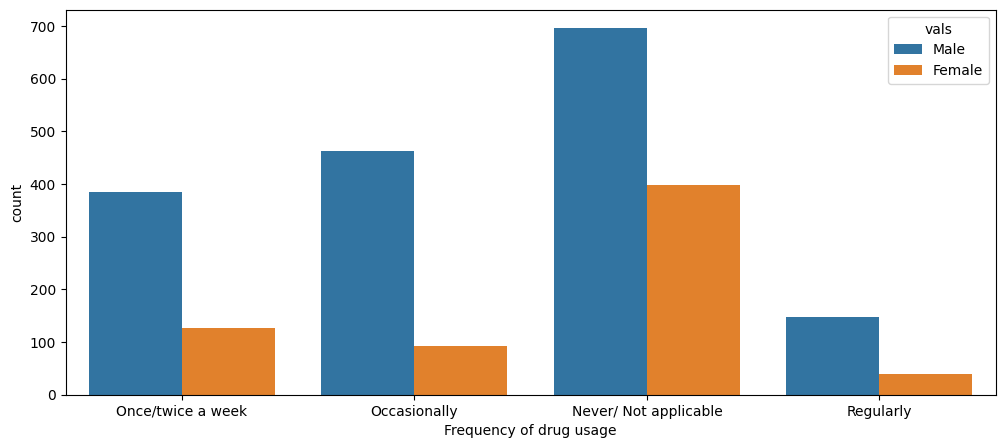

In [11]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Gender'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

From the above plot we see Regularly usage of drug is more in Male compared to Female.

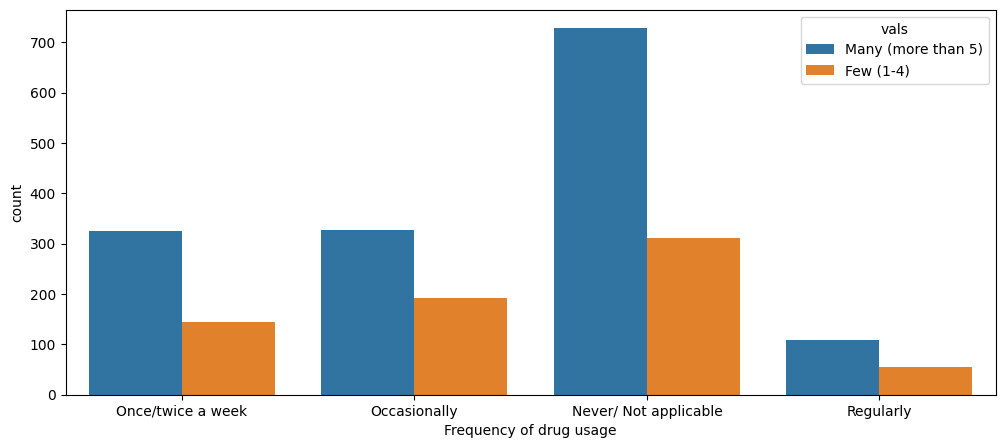

In [12]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['no. of friends'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

From the above plot we see Regularly usage of drug is more when person is having more than 5 friends.

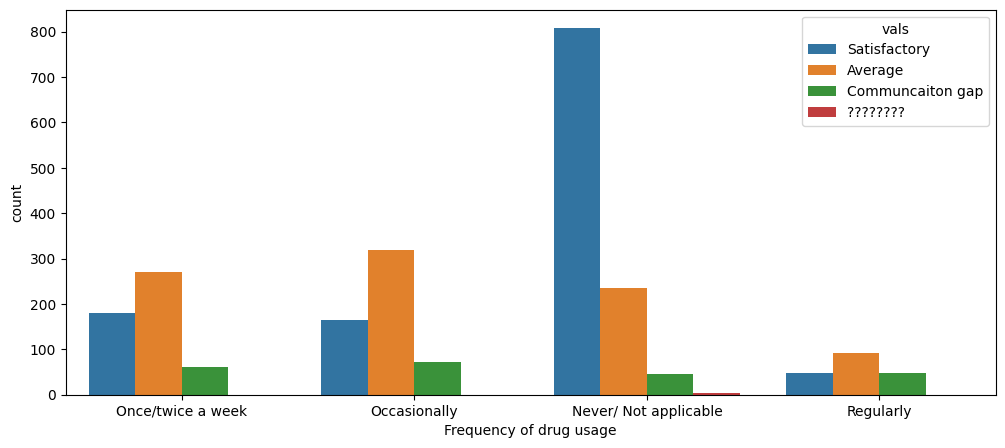

In [13]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Family relationship'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

From the above plot we see Regularly usage of drug is more in person whose Family relationship is average.

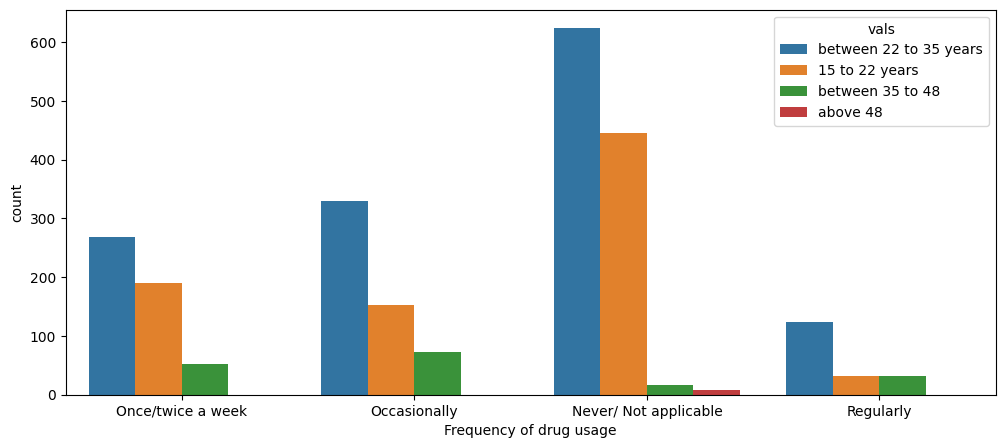

In [14]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Age'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

From the above plot we see Regularly usage of drug is more between age group of 22 to 35

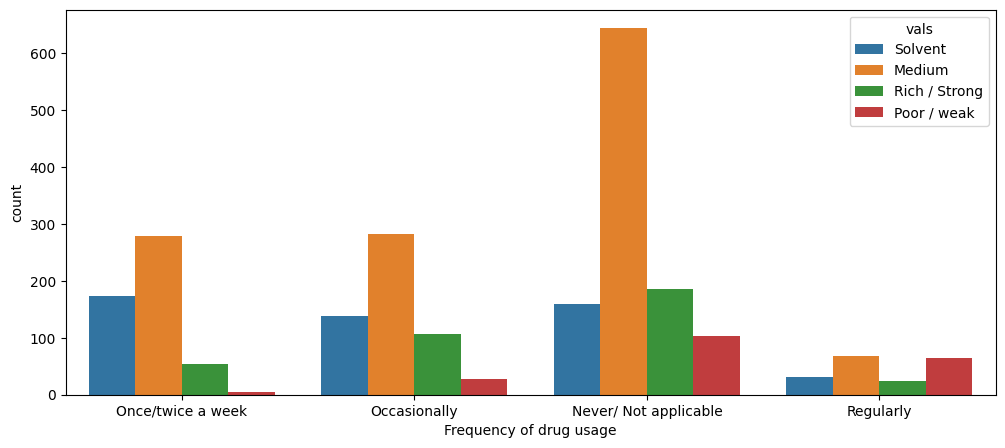

In [15]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Financials of family'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

From the above plot we see Regularly usage of drug is more in people belonging to Poor/weak section of society

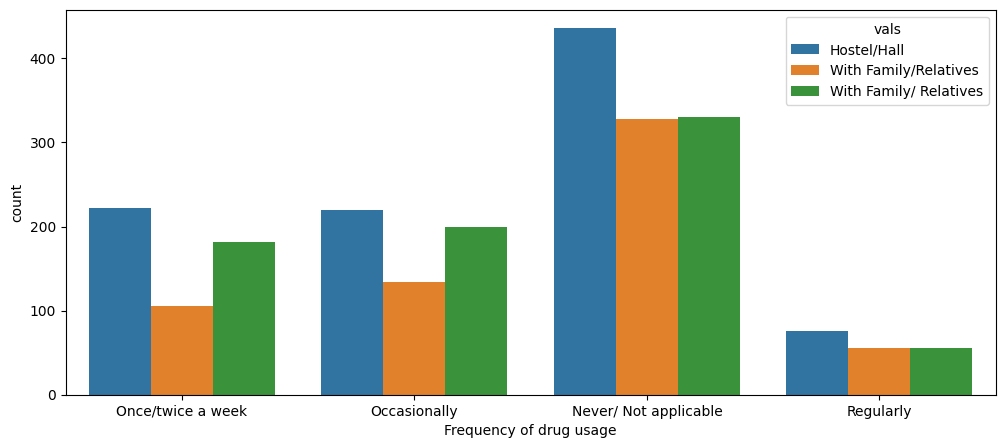

In [16]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Live with'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

From the above plot we see Regularly usage of drug is more in people who stay with their Family

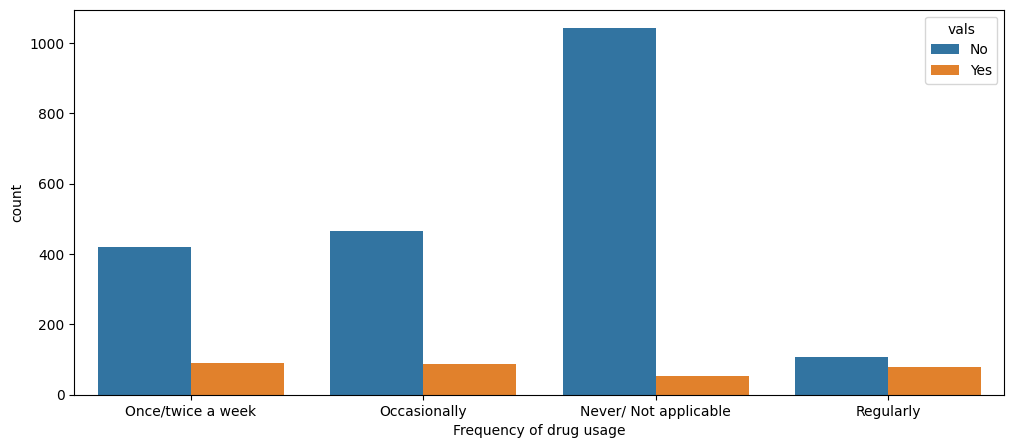

In [17]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Case in court'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

From the above plot we see Regularly usage of drug is more in people who are not currently dealing with any legal issue.

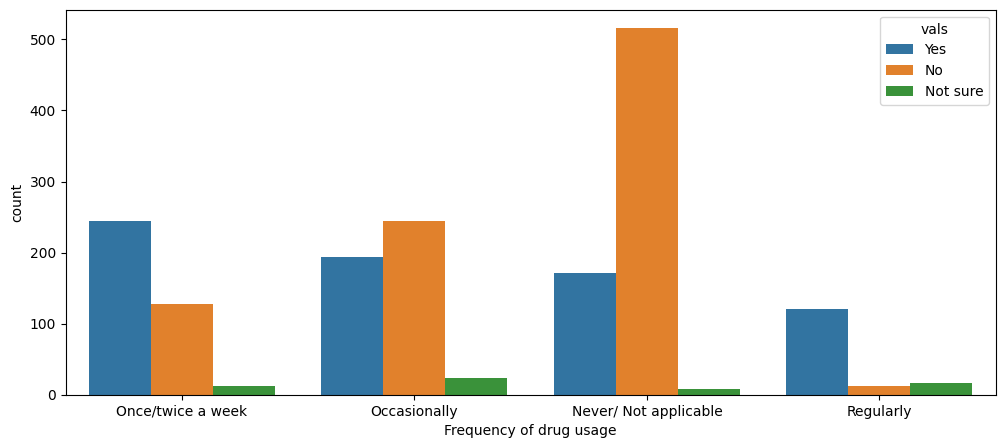

In [18]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Living with drug user'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[df['Gender']=='Male'])

From the above plot we see Regularly usage of drug is more in MALE if their friends are used to the drugs

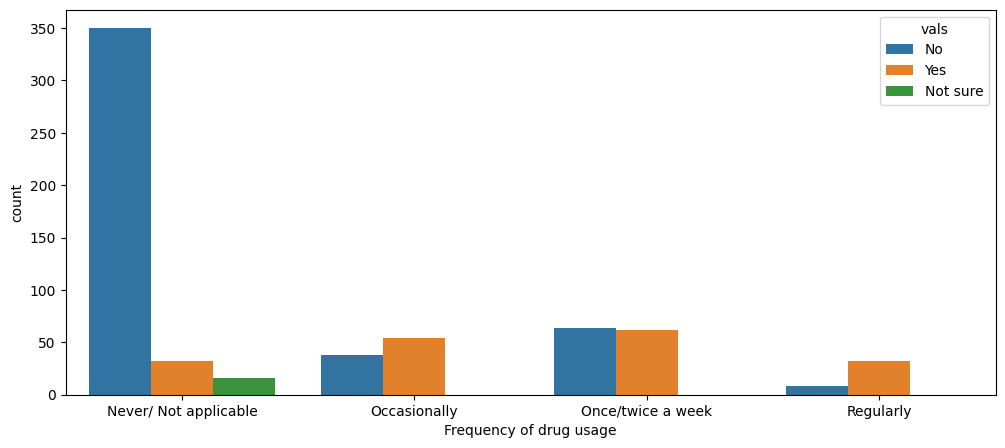

In [19]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Living with drug user'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])

From the above plot we see Regularly usage of drug Same like Male's Female's are influenced if they are in toch with friend who is regularly using it.

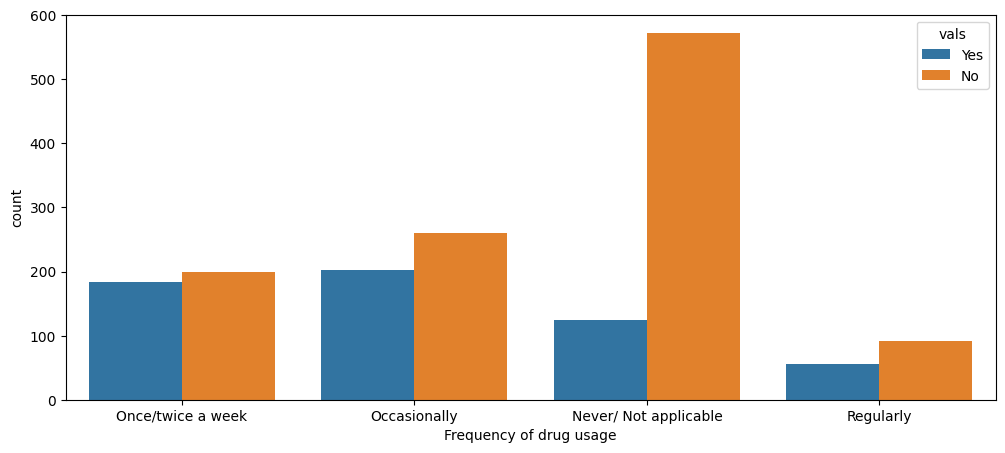

In [20]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Suicidal thoughts'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])

From the above plot we see Suicidal Ideation is less in Male who are Regularly users of drug

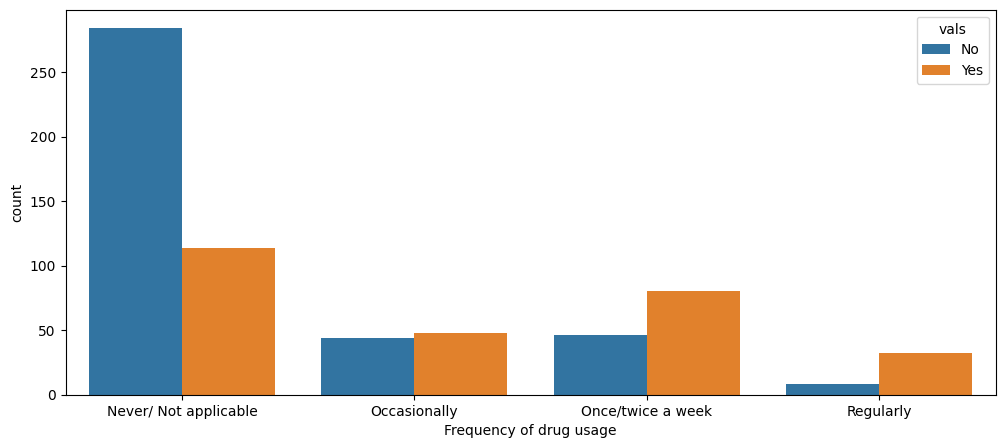

In [21]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Suicidal thoughts'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])

From the above plot we see Suicidal Ideation is MORE in Female who are Regular users of drug

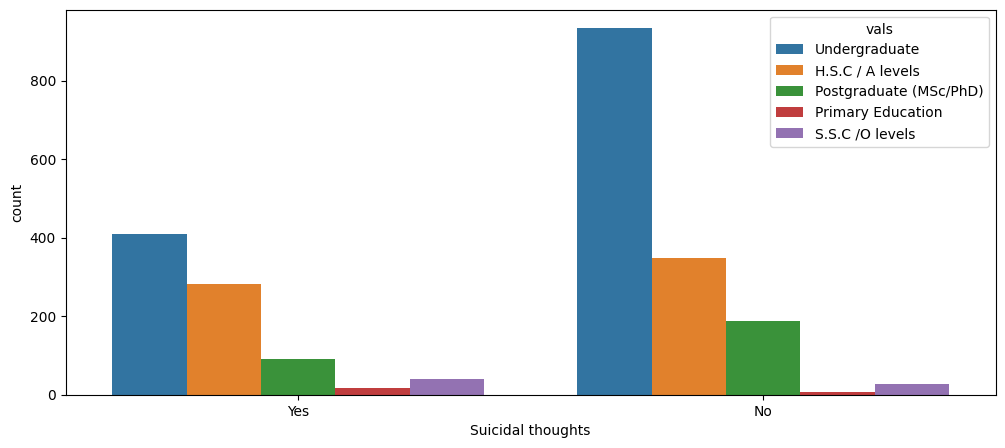

In [22]:
df01 = df.melt( id_vars=['Suicidal thoughts'],value_vars=['Education'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Suicidal thoughts", hue='vals', data=df01)

From the above plot we see Suicidal Ideation is MORE if the person is Under graduate

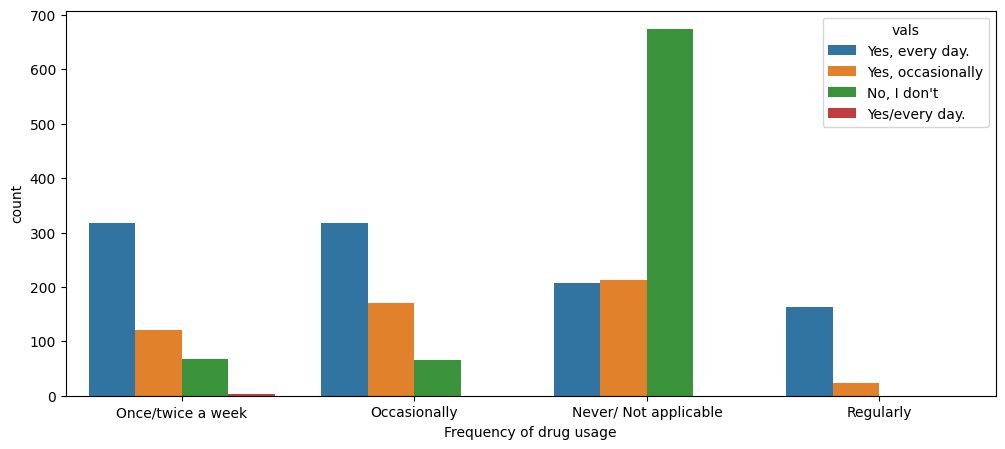

In [23]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Smoking'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

From the above plot we see Regular usage is more in people who are regular/everyday smokers, Intresting fact from the plot is if the person dont smoke he/she may not get in to the Regular usage of drug

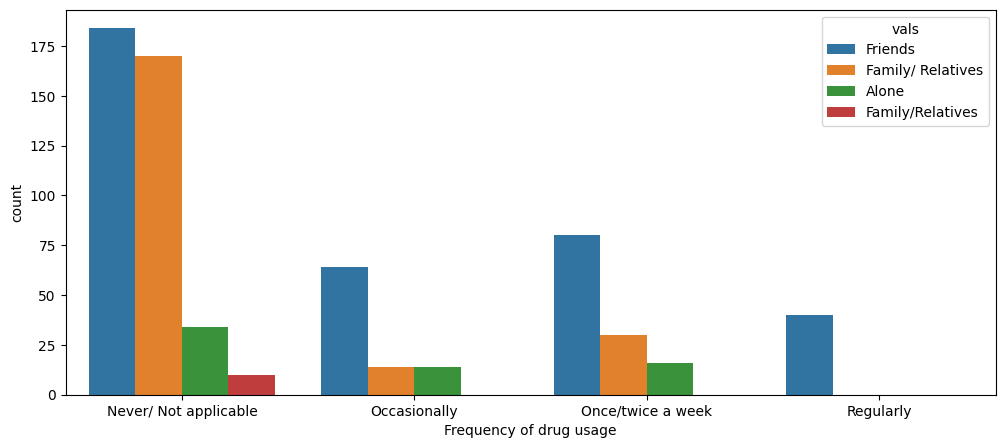

In [24]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Spend most time'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])

From the above plot we see Regular usage of drug in Female spends most of time with Friends,One intresting fact to notice is if you spend most of time with Family/Relatives you are most likely not get addicted

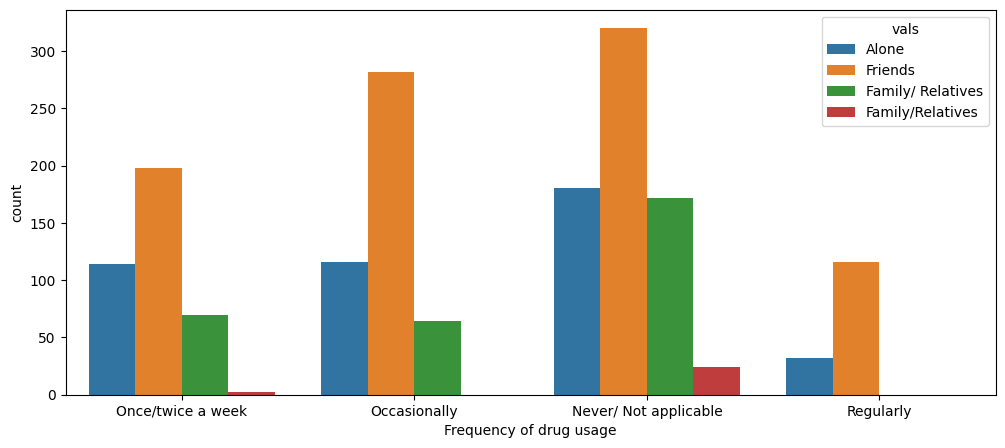

In [25]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Spend most time'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])

From the above plot we see Regular usage of drug in Male spends most of time with Friends.One intresting fact to notice is if you spend most of time with Family/Relatives you are most likely not get addicted

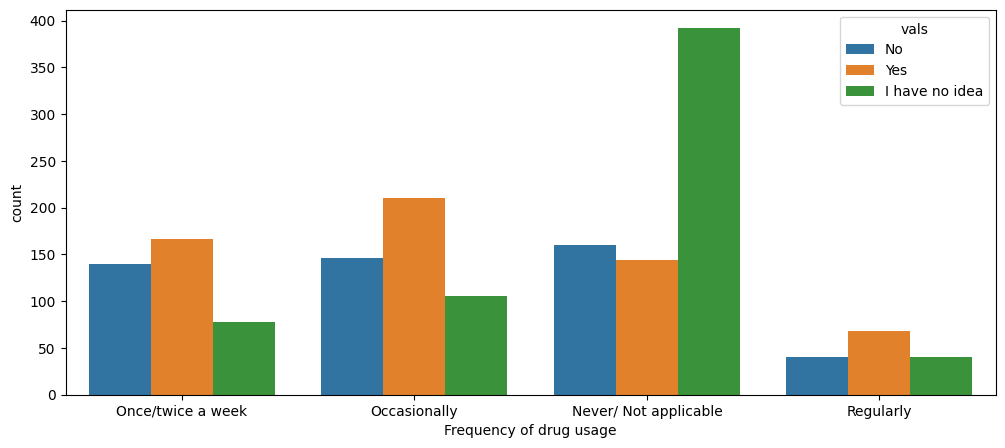

In [26]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Withdrawal symptoms'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])

From the above plot we see Regular usage of drug in Male have withdrawal symptoms

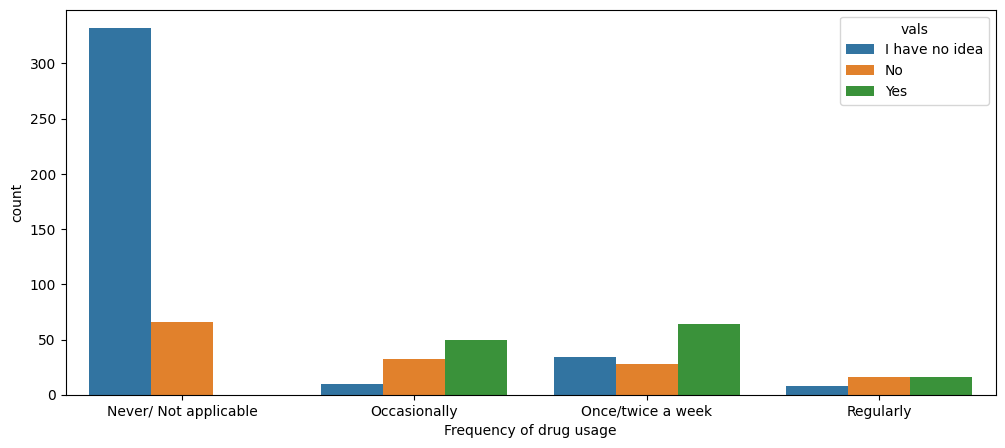

In [27]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Withdrawal symptoms'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])

From the above plot we see Regular usage of drug in Female have withdrawal symptoms

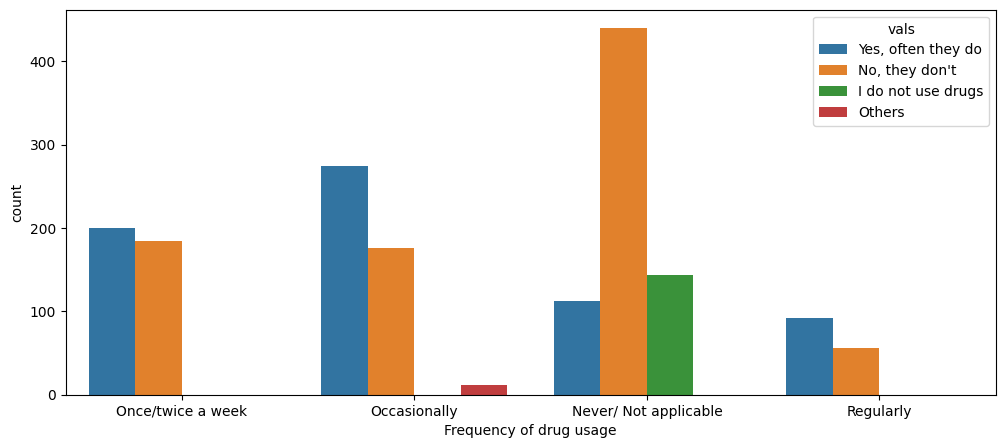

In [28]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['motivation by friends'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])

From the above plot we see Regular usage of drug in Male are those who are influenced by their friends

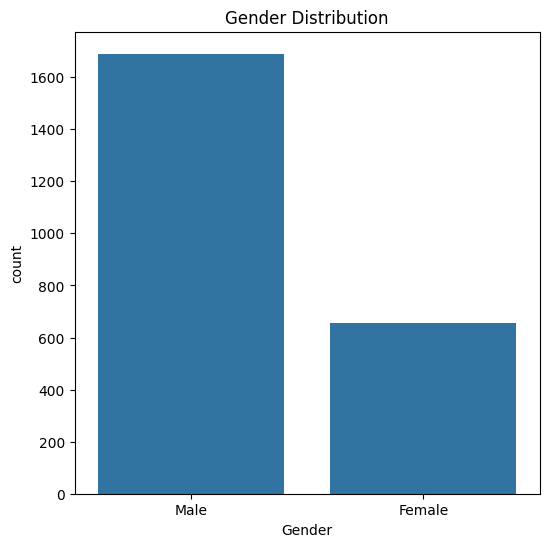

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

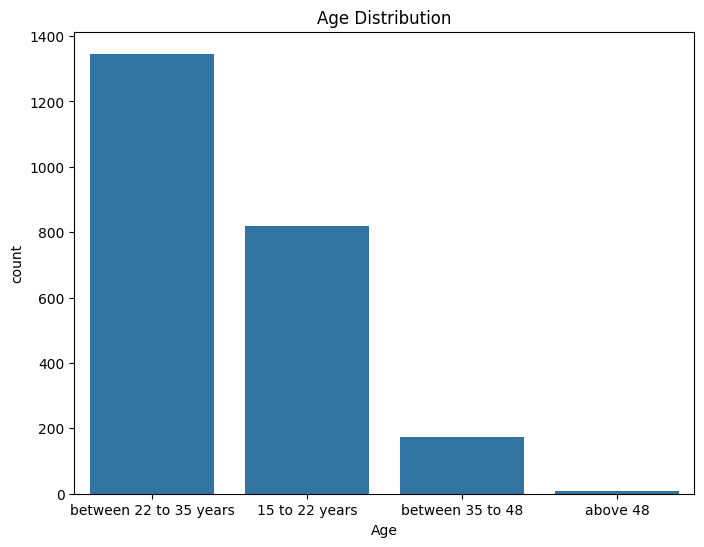

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x='Age', data=df)
plt.title('Age Distribution')
plt.show()

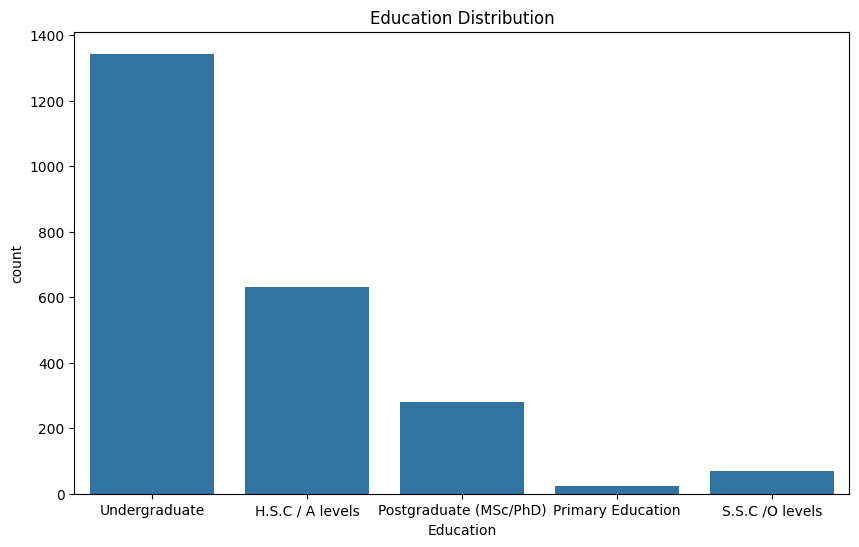

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education', data=df)
plt.title('Education Distribution')
plt.show()

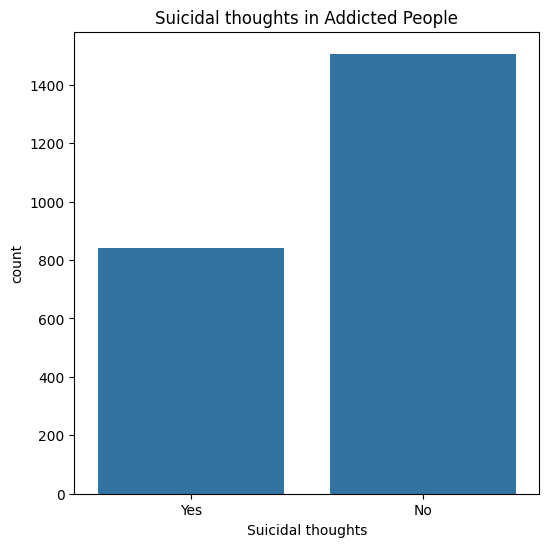

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(x='Suicidal thoughts', data=df)
plt.title('Suicidal thoughts in Addicted People')
plt.show()

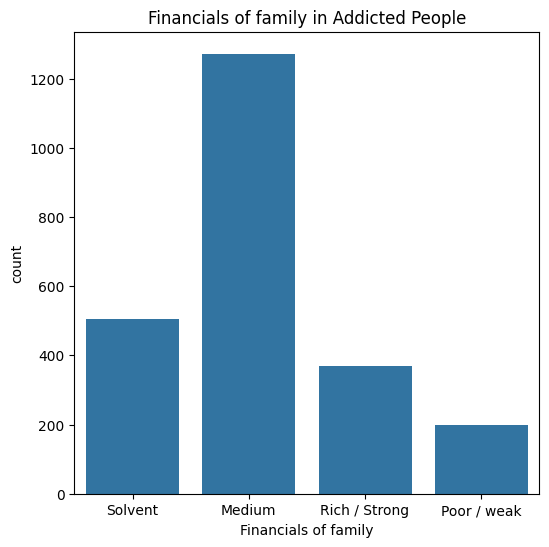

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x='Financials of family', data=df)
plt.title('Financials of family in Addicted People')
plt.show()

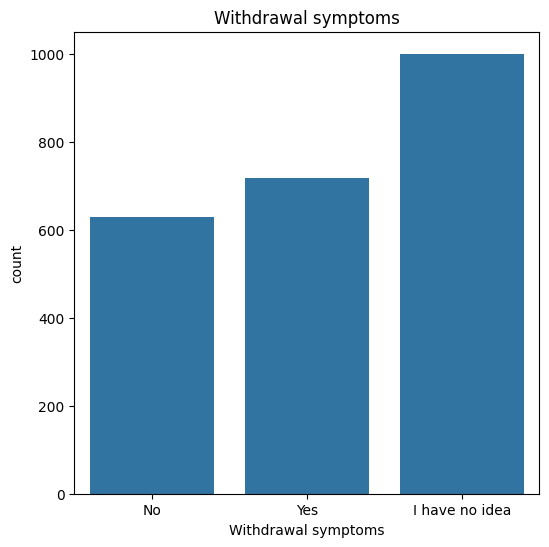

In [34]:
plt.figure(figsize=(6,6))
sns.countplot(x='Withdrawal symptoms', data=df)
plt.title('Withdrawal symptoms')
plt.show()

# LabelEncoding

In [35]:
# Encode the target column 'Suicidal thoughts'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Suicidal thoughts'] = le.fit_transform(df['Suicidal thoughts'])

# Separate features and target
X = df.drop('Suicidal thoughts', axis=1)
y = df['Suicidal thoughts']

# Encode categorical features if any
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a dictionary to store LabelEncoders for each categorical column
label_encoders = {}

# Apply Label Encoding to categorical features
for col in categorical_columns:
    le_col = LabelEncoder()
    X[col] = le_col.fit_transform(X[col])
    label_encoders[col] = le_col


In [36]:
# Display the dataset after label encoding
print("Dataset After Label Encoding:")
print(X.head())

Dataset After Label Encoding:
   Age  Gender  Education  Live with  Conflict with law  Most used drugs  \
0    2       1          4          0                  1               72   
1    2       1          0          2                  1               57   
2    0       1          0          2                  1               50   
3    2       1          4          2                  1               90   
4    2       1          4          2                  0               56   

   Motive about drug  motivation by friends  Spend most time  \
0                  6                      3                0   
1                 29                      3                3   
2                  6                      3                3   
3                 32                      3                3   
4                 33                      1                0   

   Mental/emotional problem  ...  Addicted person in family  no. of friends  \
0                         5  ...                 

# Train test split

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Used Algorithm

## RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(classification_report(y_test, y_pred_rf, target_names=['No', 'Yes']))

# Store the trained model
trained_models = {'Random Forest': rf}


Random Forest Accuracy: 99.15%
              precision    recall  f1-score   support

          No       0.99      1.00      0.99       291
         Yes       1.00      0.98      0.99       179

    accuracy                           0.99       470
   macro avg       0.99      0.99      0.99       470
weighted avg       0.99      0.99      0.99       470



In [41]:
# Save the trained model
import pickle
filename = '/content/drive/MyDrive/Defence-2/trained_model3.sav'
pickle.dump(rf, open(filename, 'wb'))

In [43]:
# Save the LabelEncoders
with open('/content/drive/MyDrive/Defence-2/label_encoders.sav', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)

# Save the StandardScaler
with open('/content/drive/MyDrive/Defence-2/scaler.sav', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the target encoder
with open('/content/drive/MyDrive/Defence-2/target_encoder.sav', 'wb') as target_file:
    pickle.dump(le, target_file)

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")
print(classification_report(y_test, y_pred_lr, target_names=['No', 'Yes']))

# Store the trained model
trained_models['Logistic Regression'] = lr


Logistic Regression Accuracy: 70.43%
              precision    recall  f1-score   support

          No       0.73      0.83      0.78       291
         Yes       0.64      0.50      0.56       179

    accuracy                           0.70       470
   macro avg       0.69      0.67      0.67       470
weighted avg       0.70      0.70      0.70       470



## SVC

In [ ]:
from sklearn.svm import SVC

# Train SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Evaluate SVM
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(classification_report(y_test, y_pred_svm, target_names=['No', 'Yes']))

# Store the trained model
trained_models['SVM'] = svm


SVM Accuracy: 94.26%
              precision    recall  f1-score   support

          No       0.93      0.98      0.95       291
         Yes       0.96      0.88      0.92       179

    accuracy                           0.94       470
   macro avg       0.95      0.93      0.94       470
weighted avg       0.94      0.94      0.94       470



## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train k-NN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluate k-NN
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"k-NN Accuracy: {accuracy_knn * 100:.2f}%")
print(classification_report(y_test, y_pred_knn, target_names=['No', 'Yes']))

# Store the trained model
trained_models['k-NN'] = knn


k-NN Accuracy: 93.62%
              precision    recall  f1-score   support

          No       0.93      0.98      0.95       291
         Yes       0.96      0.87      0.91       179

    accuracy                           0.94       470
   macro avg       0.94      0.92      0.93       470
weighted avg       0.94      0.94      0.94       470



## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Evaluate Gradient Boosting
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%")
print(classification_report(y_test, y_pred_gb, target_names=['No', 'Yes']))

# Store the trained model
trained_models['Gradient Boosting'] = gb


Gradient Boosting Accuracy: 90.64%
              precision    recall  f1-score   support

          No       0.90      0.95      0.93       291
         Yes       0.91      0.84      0.87       179

    accuracy                           0.91       470
   macro avg       0.91      0.89      0.90       470
weighted avg       0.91      0.91      0.91       470



## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Evaluate Decision Tree
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print(classification_report(y_test, y_pred_dt, target_names=['No', 'Yes']))

# Store the trained model
trained_models['Decision Tree'] = dt


Decision Tree Accuracy: 99.15%
              precision    recall  f1-score   support

          No       0.99      0.99      0.99       291
         Yes       0.99      0.99      0.99       179

    accuracy                           0.99       470
   macro avg       0.99      0.99      0.99       470
weighted avg       0.99      0.99      0.99       470



## GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate Naive Bayes
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print(classification_report(y_test, y_pred_nb, target_names=['No', 'Yes']))

# Store the trained model
trained_models['Naive Bayes'] = nb


Naive Bayes Accuracy: 70.00%
              precision    recall  f1-score   support

          No       0.74      0.80      0.77       291
         Yes       0.62      0.53      0.57       179

    accuracy                           0.70       470
   macro avg       0.68      0.67      0.67       470
weighted avg       0.69      0.70      0.69       470



## Multilayer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate MLP
y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp * 100:.2f}%")
print(classification_report(y_test, y_pred_mlp, target_names=['No', 'Yes']))

# Store the trained model
trained_models['MLP'] = mlp

MLP Accuracy: 98.72%
              precision    recall  f1-score   support

          No       0.98      1.00      0.99       291
         Yes       1.00      0.97      0.98       179

    accuracy                           0.99       470
   macro avg       0.99      0.98      0.99       470
weighted avg       0.99      0.99      0.99       470



## CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.metrics import accuracy_score, classification_report

# Reshape the data to fit into the Conv1D layer
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build CNN model
cnn = Sequential()
cnn.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn.add(Flatten())
cnn.add(Dense(100, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN
cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=10, verbose=1)

# Evaluate CNN
y_pred_cnn = (cnn.predict(X_test_cnn) > 0.5).astype("int32")
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"CNN Accuracy: {accuracy_cnn * 100:.2f}%")
print(classification_report(y_test, y_pred_cnn, target_names=['No', 'Yes']))

# Store the trained model
trained_models['CNN'] = cnn


Epoch 1/10
188/188 [==============================] - 2s 3ms/step - loss: 0.4953 - accuracy: 0.7500
Epoch 2/10
188/188 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8497
Epoch 3/10
188/188 [==============================] - 1s 3ms/step - loss: 0.2422 - accuracy: 0.9088
Epoch 4/10
188/188 [==============================] - 1s 4ms/step - loss: 0.1373 - accuracy: 0.9622
Epoch 5/10
188/188 [==============================] - 1s 3ms/step - loss: 0.0787 - accuracy: 0.9851
Epoch 6/10
188/188 [==============================] - 1s 3ms/step - loss: 0.0490 - accuracy: 0.9899
Epoch 7/10
188/188 [==============================] - 1s 3ms/step - loss: 0.0284 - accuracy: 0.9941
Epoch 8/10
188/188 [==============================] - 1s 6ms/step - loss: 0.0128 - accuracy: 0.9984
Epoch 9/10
188/188 [==============================] - 1s 7ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 10/10
15/15 [==============================] - 0s 2ms/step
CNN Accuracy: 98.30%
              

# Predict output (Both)

In [ ]:
# Define a function to predict suicidal thought using a specified model
def predict_suicidal_thought(input_data, model_name='Random Forest'):
    # Convert input data to a DataFrame
    input_df = pd.DataFrame([input_data])

    # Apply the same preprocessing steps
    for col in categorical_columns:
        if col in input_df.columns:
            # Handle unseen labels
            input_df[col] = input_df[col].apply(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

    input_df = scaler.transform(input_df)

    # Reshape data if CNN model is used
    if model_name == 'CNN':
        input_df = input_df.reshape(input_df.shape[0], input_df.shape[1], 1)

    # Make prediction
    model = trained_models[model_name]
    if model_name in ['CNN', 'MLP']:
        prediction = (model.predict(input_df) > 0.5).astype("int32")
    else:
        prediction = model.predict(input_df)

    return 'Yes' if prediction[0] == 1 else 'No'

# Example usage of the prediction function
input_data = {
    'Age': 30,  # Provide numerical value instead of 'between 22 to 35 years'
    'Gender': 'Male',
    'Education': 'Graduate',
    'Live with': 'Family',
    'Conflict with law': 'No',
    'Most used drugs': 'Alcohol',
    'Motive about drug': 'Curiosity',
    'motivation by friends': 'Yes',
    'Spend most time': 'Work',
    'Mental/emotional problem': 'Yes',
    'Family relationship': 'Good',
    'Financials of family': 'Stable',
    'Addicted person in family': 'No',
    'no. of friends': 5,
    'Withdrawal symptoms': 'No',
    'Satisfied with workplace': 'Yes',
    'Case in court': 'No',
    'Living with drug user': 'No',
    'Smoking': 'No',
    'Easy to control use of drug': 'Yes',
    'Frequency of drug usage': 'Occasionally',
    'Taken drug while experiencing stress': 'Yes'
}

# Predict using each model
for model_name in trained_models.keys():
    print(f"{model_name} prediction: {predict_suicidal_thought(input_data, model_name)}")

Random Forest prediction: Yes
Logistic Regression prediction: Yes
SVM prediction: Yes
k-NN prediction: No
Gradient Boosting prediction: Yes
Decision Tree prediction: Yes
Naive Bayes prediction: Yes
MLP prediction: Yes
1/1 [==============================] - 0s 20ms/step
CNN prediction: Yes


[The End]

In [ ]:
import pickle
filename = 'trained_model2.sav'
pickle.dump(rf, open(filename, 'wb'))